# Statistical Machine Learning - Assignment 2

### Authors

Student 1

* Name: Christoph Schmidl
* Studentnumber: s4226887
* Studentemail: c.schmidl@student.ru.nl

Student 2

* Name: Mark Beijer
* Studentnumber: s4354834
* Studentemail: mbeijer@science.ru.nl

## Exercise 3.1

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


# Exercise 3.1.1

# numpy.linalg.inv(a)
# Compute the (multiplicative) inverse of a matrix.
# Given a square matrix a, return the matrix ainv 
# satisfying dot(a, ainv) = dot(ainv, a) = eye(a.shape[0]).

# See: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.linalg.inv.html

covariance_matrix = np.array([
        [0.14, -0.3, 0.0, 0.2], 
        [-0.3, 1.16, 0.2, -0.8], 
        [0.0, 0.2, 1.0, 1.0], 
        [0.2, -0.8, 1.0, 2.0]])

precision_matrix = np.linalg.inv(covariance_matrix)

print(precision_matrix)


precision_matrix_aa = np.array([
        [60, 50], 
        [50, 50]])

inv_presision_matrix_aa = np.linalg.inv(precision_matrix_aa)

print(inv_presision_matrix_aa)



[[ 60.   50.  -48.   38. ]
 [ 50.   50.  -50.   40. ]
 [-48.  -50.   52.4 -41.4]
 [ 38.   40.  -41.4  33.4]]
[[ 0.1  -0.1 ]
 [-0.1   0.12]]


In [15]:
# Exercise 3.1.2

# numpy.random.multivariate_normal(mean, cov[, size, check_valid, tol])

# Draw random samples from a multivariate normal distribution.

# The multivariate normal, multinormal or Gaussian distribution is a 
# generalization of the one-dimensional normal distribution to higher
# dimensions. Such a distribution is specified by its mean and covariance
# matrix. These parameters are analogous to the mean (average or “center”)
# and variance (standard deviation, or “width,” squared) of the 
# one-dimensional normal distribution.

def generate_random_number_pair():
    return np.random.multivariate_normal(
    [0.8, 0.8],
    [[0.1, -0.1], [-0.1, 0.12]])

random_pair = generate_random_number_pair()
print(random_pair)

[ 0.25822872  1.32385609]


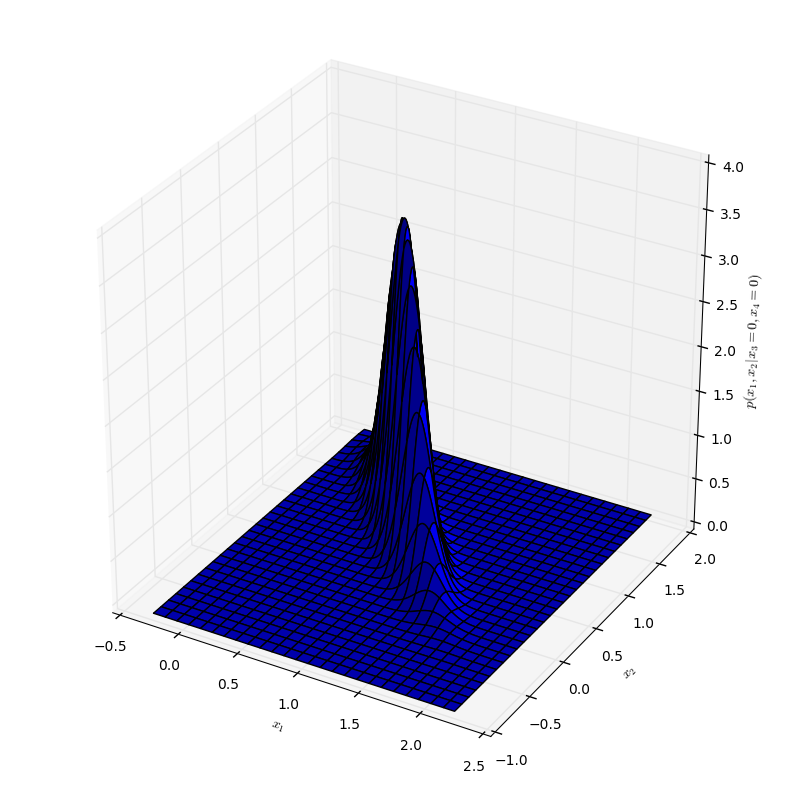

In [19]:
# Exercise 3.1.3

x, y = np.mgrid[-0.25:2.25:.01, -1:2:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
mu_p = [0.8, 0.8]
cov_p = [[0.1, -0.1], [-0.1, 0.12]]
z = multivariate_normal(mu_p, cov_p).pdf(pos)

fig = plt.figure(figsize=(10, 10), dpi=300)
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax.set_zlabel('$p(x_1, x_2 | x_3=0, x_4=0)$')
plt.savefig('3_1_3.png', bbox_inches='tight', dpi=300)
plt.show()

## Exercise 3.2

In [21]:
# Exercise 3.2.1

number_of_datapoints = 1000

covariance_3_2 = np.array([[2.0, 0.8],[0.8, 4.0]])
print(covariance_3_2)

data = np.random.multivariate_normal(
    random_pair,
    covariance_3_2,
    number_of_datapoints)

np.savetxt('ex3_data.txt', data)


[[ 2.   0.8]
 [ 0.8  4. ]]


In [25]:
# Exercise 3.2.2

mle_mean = np.mean(data, axis=0) # to take the mean of each col
print(mean)
normalized_data = data - mle_mean
mle_covariance = np.dot(normalized_data.T, normalized_data) / number_of_datapoints
mle_covariance_unbiased =  np.dot(normalized_data.T, normalized_data) / (number_of_datapoints - 1)
print(mle_covariance)
print(mle_covariance_unbiased)

[ 0.24887413  1.39664922]
[[ 1.91424907  0.90025163]
 [ 0.90025163  3.91668677]]
[[ 1.91616523  0.90115278]
 [ 0.90115278  3.92060738]]


In [27]:
# Exercise 3.3.1

mu = 0
for i in range(1, np.size(data, 0)+1):
    mu = mu + 1.0 / i * (data[i-1] - mu)
    print(mu)

[-0.56673774 -1.70521952]
[-0.10596996 -0.68096132]
[-0.04511329  0.06627932]
[ 0.1220028  -0.63145529]
[ 0.32650488 -0.22245907]
[ 0.1235577   0.60225677]
[ 0.19999092  0.37008339]
[ 0.41095621  0.9686375 ]
[ 0.6811447   1.05155866]
[ 0.55009879  1.07036138]
[ 0.43327361  0.86053807]
[ 0.50165256  0.66432927]
[ 0.45762257  0.73416002]
[ 0.47866611  0.90198303]
[ 0.61526875  1.05265903]
[ 0.61571777  1.21408695]
[ 0.6282563   1.48972815]
[ 0.53325735  1.5428003 ]
[ 0.52692549  1.51157203]
[ 0.52647941  1.25901532]
[ 0.48646227  1.37822049]
[ 0.53786417  1.31821781]
[ 0.46671354  1.39468404]
[ 0.4343204   1.40922946]
[ 0.36641148  1.34922373]
[ 0.41352975  1.39784068]
[ 0.43472781  1.36854242]
[ 0.54405143  1.3671373 ]
[ 0.5583284   1.44650498]
[ 0.52985172  1.4980552 ]
[ 0.52517922  1.5134918 ]
[ 0.55815137  1.46597348]
[ 0.5313491   1.54510381]
[ 0.49350121  1.50011963]
[ 0.51277631  1.58758112]
[ 0.48312564  1.59842355]
[ 0.49598291  1.57536191]
[ 0.41279713  1.49734802]
[ 0.44419542